<a href="https://colab.research.google.com/github/Jueunkim429/Colab-Notebooks/blob/main/MIMIC_III_ADMISSIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 가공

## 1) 총 환자수

In [ ]:
# load dataset
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ADMISSIONS.csv',delimiter=',')
data.set_index('row_id', inplace=True)
data.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
row_id,,,,,,,,,,,,,,,,,,
12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2) 평균 입원시간

In [ ]:
# import libraries
import datetime
import numpy as np

dateformat = "%Y-%m-%d %H:%M:%S"
admit_dur = []

for i in range(len(data)):
    start_datetime = data['admittime'][data.index[i]]
    end_datetime = data['dischtime'][data.index[i]]
    
    start_convert = datetime.datetime.strptime(start_datetime, dateformat)
    end_convert = datetime.datetime.strptime(end_datetime, dateformat)
    
    admit_day = (end_convert-start_convert).days
    admit_dur.append(admit_day)
    
print("평균 입원일 : ",np.mean(admit_dur))

평균 입원일 :  8.775193798449612


## 3) 입원 유형의 종류(admission_type)와 유형별 환자수

In [ ]:
print(data['admission_type'].unique())
print(data['admission_type'].nunique())
print(data['admission_type'].value_counts())

['EMERGENCY' 'ELECTIVE' 'URGENT']
3
EMERGENCY    119
ELECTIVE       8
URGENT         2
Name: admission_type, dtype: int64


## 4) 진단명(diagnosis)의 종류와 진단별 환자수

In [ ]:
print(data['diagnosis'].unique())
print(data['diagnosis'].nunique())
print(data['diagnosis'].value_counts())

['SEPSIS' 'HEPATITIS B' 'HUMERAL FRACTURE' 'ALCOHOLIC HEPATITIS'
 'STROKE/TIA'
 ' MITRAL REGURGITATION;CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH MVR  ? MITRAL VALVE REPLACEMENT /SDA'
 'SYNCOPE;TELEMETRY' 'RIGHT HUMEROUS FRACTURE'
 'RENAL FAILIURE-SYNCOPE-HYPERKALEMIA'
 'RECURRENT LEFT CAROTID STENOSIS,PRE HYDRATION' 'FAILURE TO THRIVE'
 'PULMONARY EDEMA\\CATH' 'UNSTABLE ANGINA' 'RESPIRATORY DISTRESS'
 'METASTATIC MELANOMA;BRAIN METASTASIS' 'FEVER' 'BRAIN METASTASES'
 'VARICEAL BLEED' 'LOWER GI BLEED' 'CHEST PAIN/ CATH'
 'SUBDURAL HEMATOMA/S/P FALL' 'ESOPHAGEAL CANCER/SDA'
 'S/P MOTORCYCLE ACCIDENT' 'SEIZURE' 'GASTROINTESTINAL BLEED'
 'LUNG CANCER;SHORTNESS OF BREATH' 'HYPOTENSION'
 'SEPSIS;PNEUMONIA;TELEMETRY' 'CONGESTIVE HEART FAILURE' 'UROSEPSIS'
 'BASAL GANGLIN BLEED' 'OVERDOSE' 'CRITICAL AORTIC STENOSIS/HYPOTENSION'
 'HYPOTENSION;TELEMETRY' 'SEPSIS;TELEMETRY'
 'STATUS POST MOTOR VEHICLE ACCIDENT WITH INJURIES' 'TACHYPNEA;TELEMETRY'
 'CHRONIC MYELOGENOUS LEUKEMIA;TR

# 2. PIE CHART

In [ ]:
# import libraries
import pandas as pd

## 1) religion

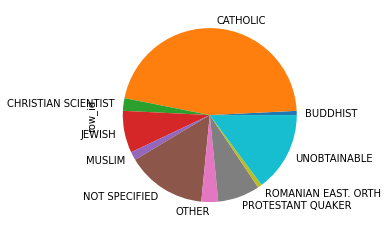

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ADMISSIONS.csv')
data.groupby(['religion']).count()['row_id'].plot(kind='pie')

## 2) marital_status

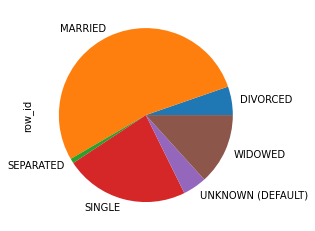

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ADMISSIONS.csv')
data.groupby(['marital_status']).count()['row_id'].plot(kind='pie')

## 3) ethnicity

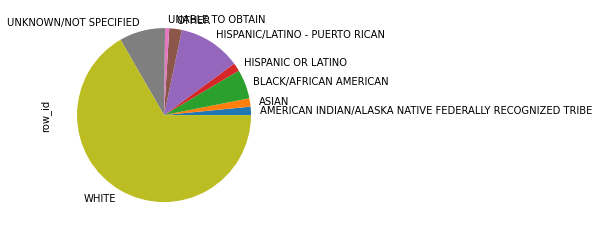

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ADMISSIONS.csv')
data.groupby(['ethnicity']).count()['row_id'].plot(kind='pie')

# 3. BAR GRAPTH

## 1) religion

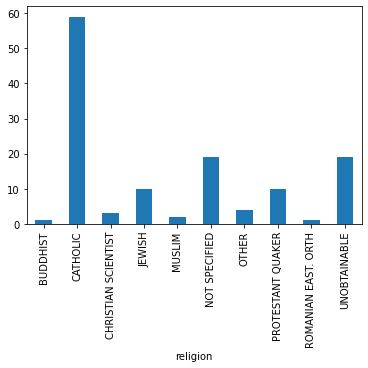

In [ ]:
data.groupby(['religion']).count()['row_id'].plot(kind='bar')

## 2) marital_status

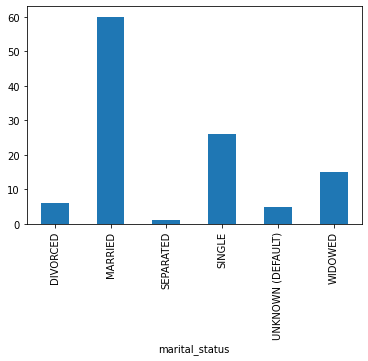

In [ ]:
data.groupby(['marital_status']).count()['row_id'].plot(kind='bar')

## 3) ethnicity

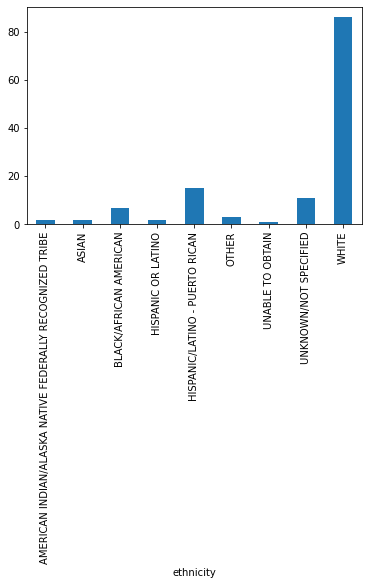

In [ ]:
data.groupby(['ethnicity']).count()['row_id'].plot(kind='bar')

# 4. gender 항목을 황용해 서로 공유하는 그래프 만들기

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PATIENTS.csv')
pdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ADMISSIONS.csv')
mergedata = pd.merge(data, pdata, on= 'subject_id', how='inner')

## 1) religion

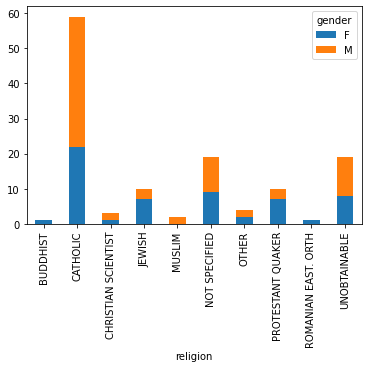

In [ ]:
mergedata.groupby(['religion','gender']).size().unstack().plot(kind="bar",stacked=True)

## 2) marital_status

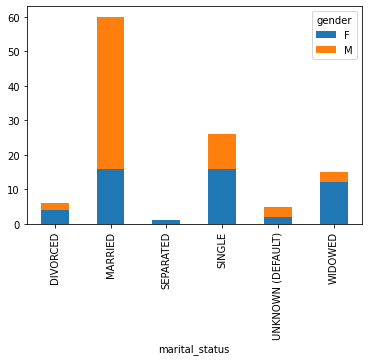

In [ ]:
mergedata.groupby(['marital_status','gender']).size().unstack().plot(kind="bar",stacked=True)

## 3) ethnicity

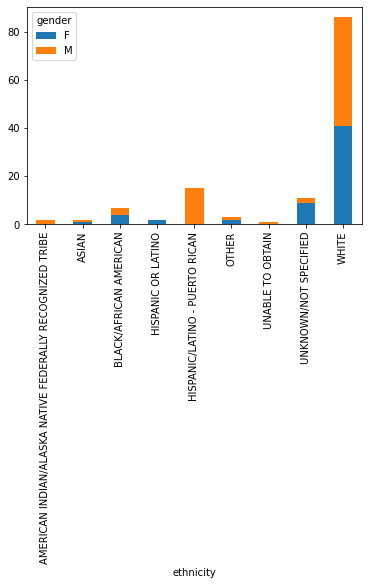

In [ ]:
mergedata.groupby(['ethnicity','gender']).size().unstack().plot(kind="bar",stacked=True)